# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [7]:
# seleciona apenas colunas numéricas
df_numericas = df.select_dtypes(include=['int64', 'float64'])

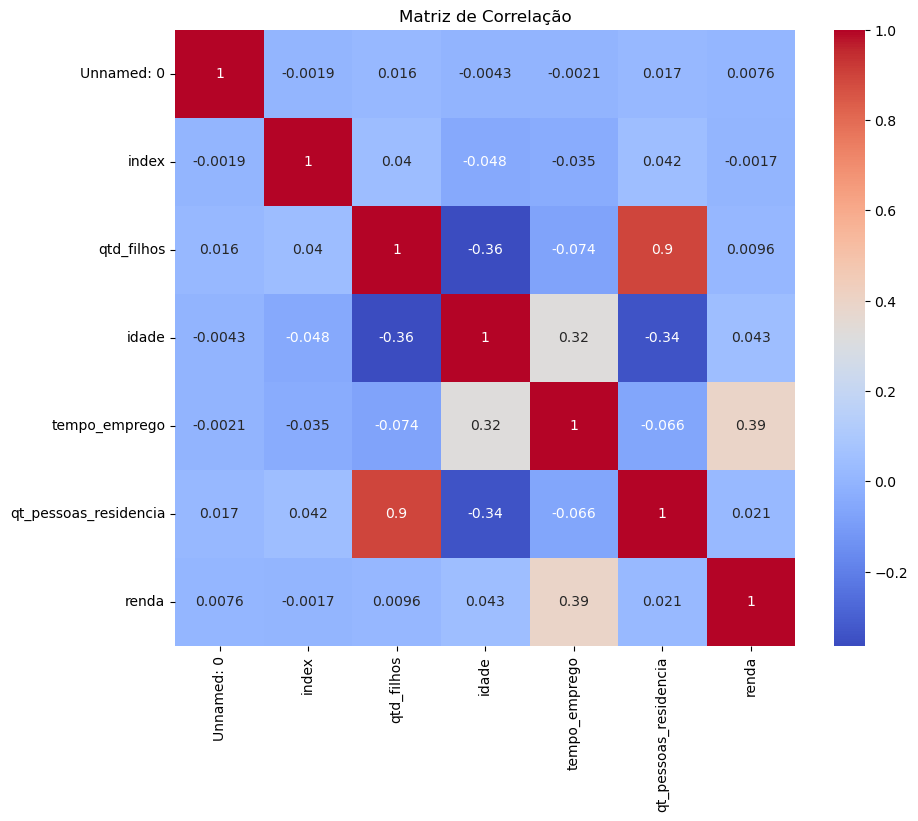

In [8]:
# matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df_numericas.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

-> Nota-se que o tempo de emprego possui uma correlação relativamente alta.

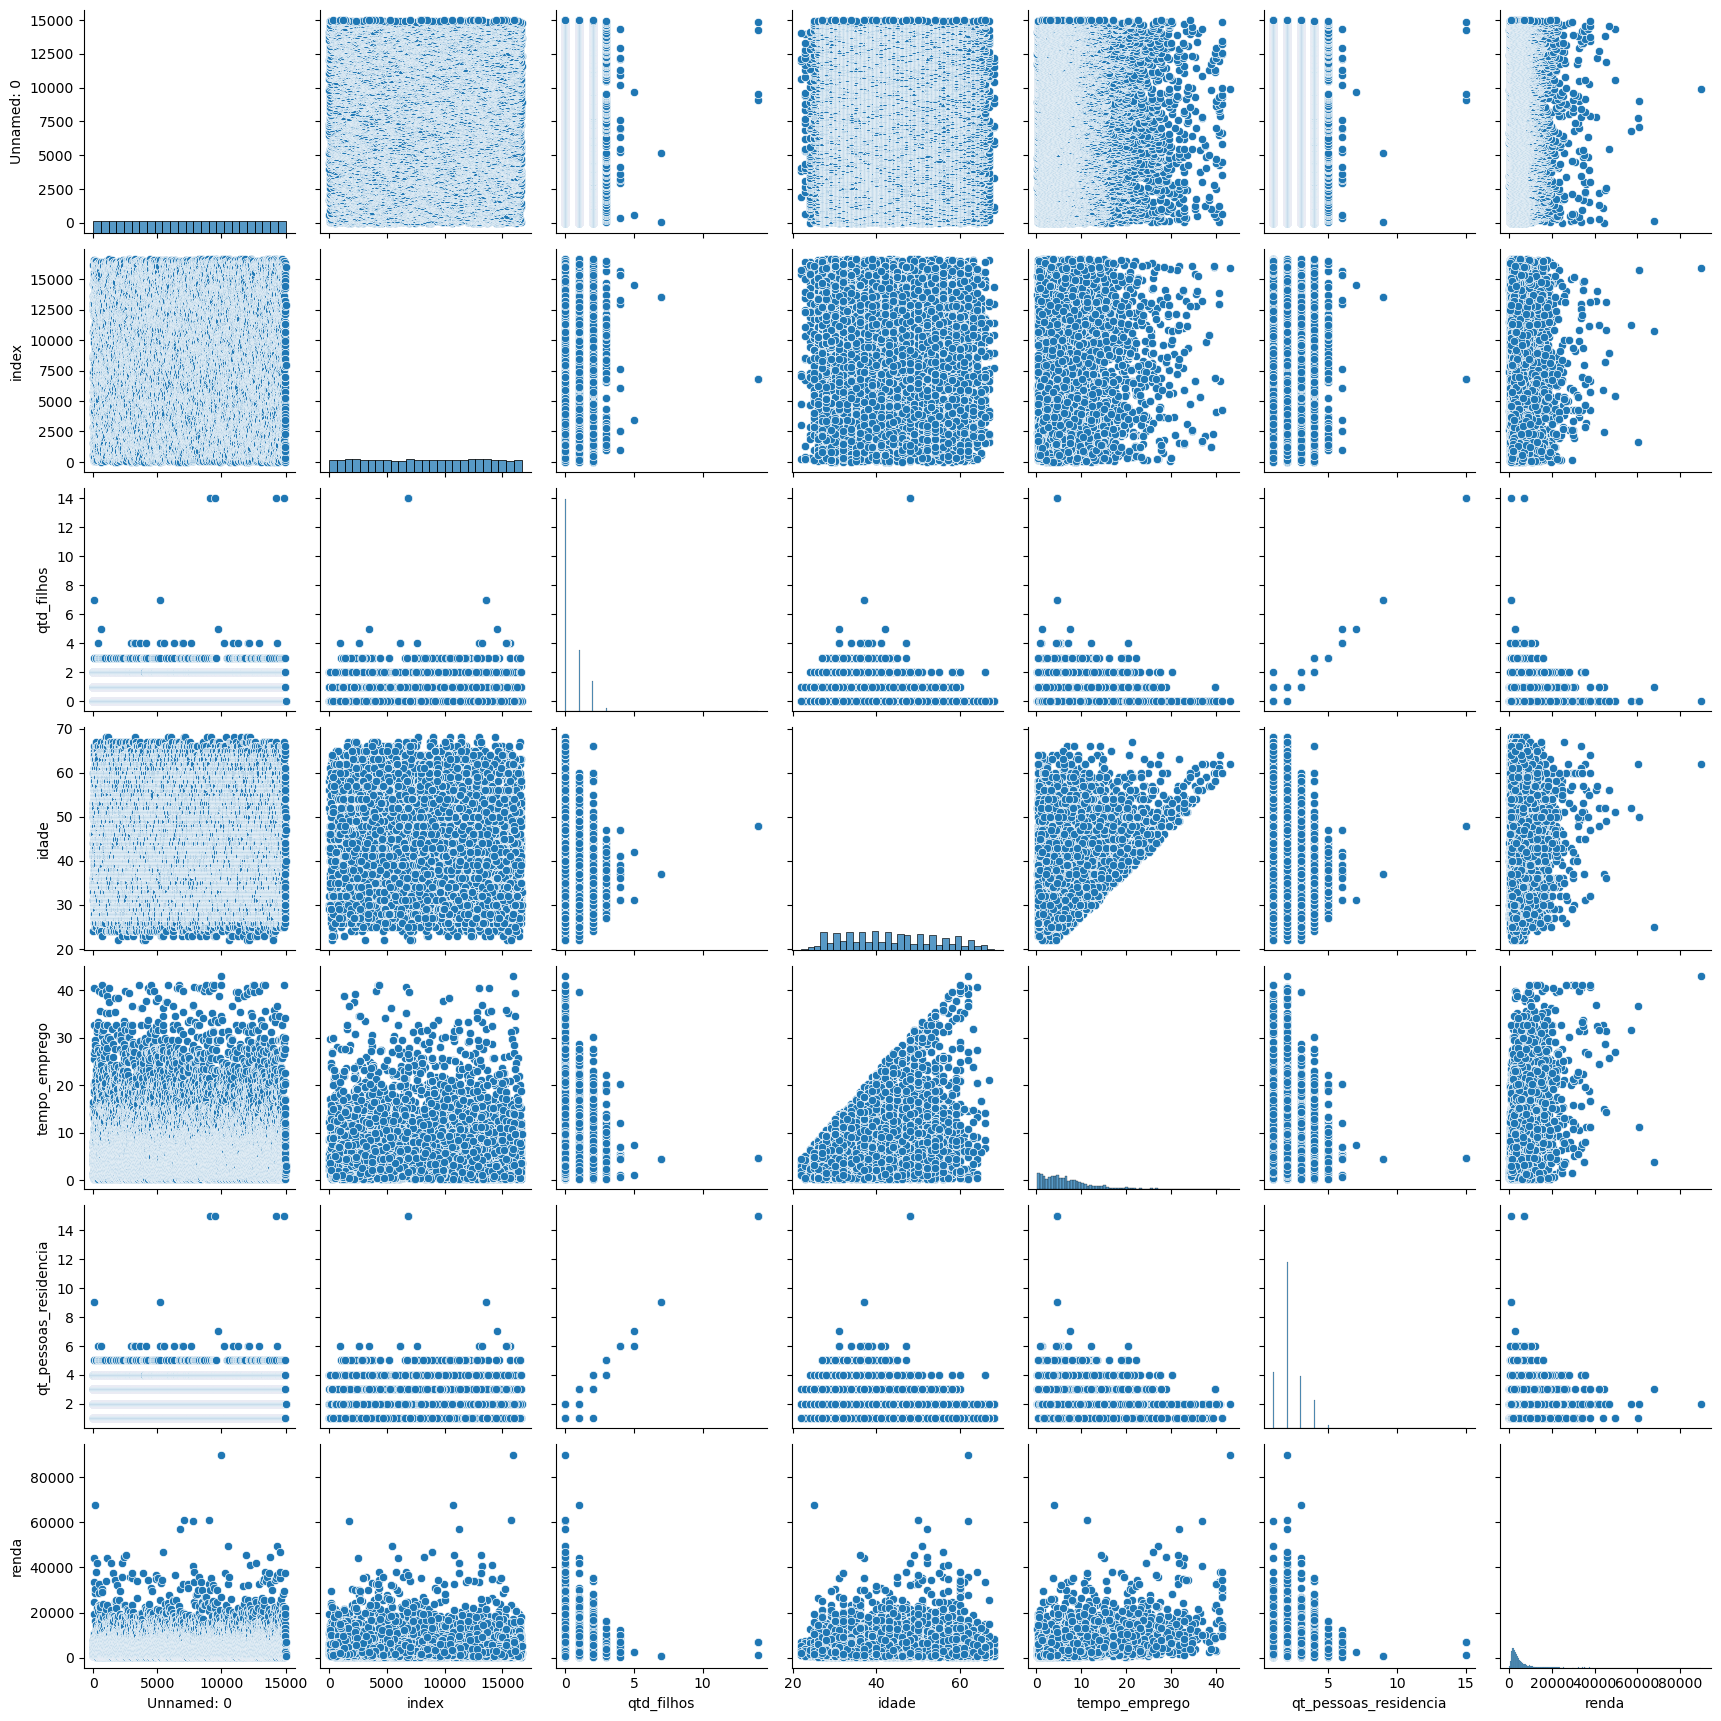

In [12]:
# matriz de dispersão (pairplot)
sns.pairplot(df_numericas)
plt.show()

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

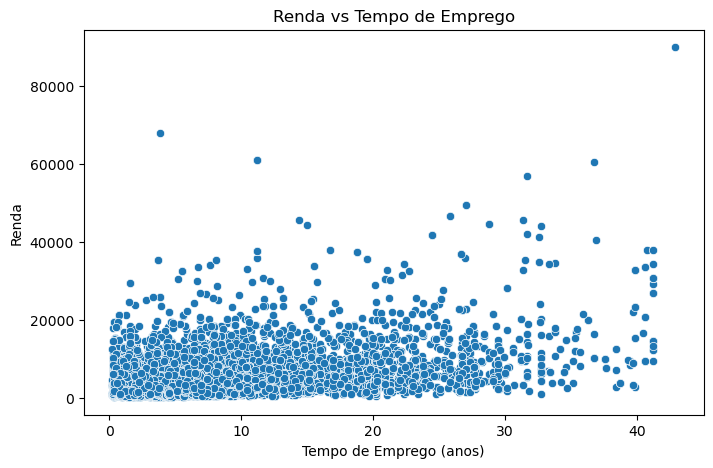

In [11]:
# scatterplot renda x tempo de emprego 
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='tempo_emprego', y='renda')
plt.title('Renda vs Tempo de Emprego')
plt.xlabel('Tempo de Emprego (anos)')
plt.ylabel('Renda')
plt.show()

-> Existe uma concentração densa de dados entre 0 e 25 anos de tempo de emprego e rendas entre 0 e 20.000.

-> À medida que o tempo de emprego aumenta, parece haver uma tendência leve de aumento na renda, mas o padrão não é tão forte visualmente.

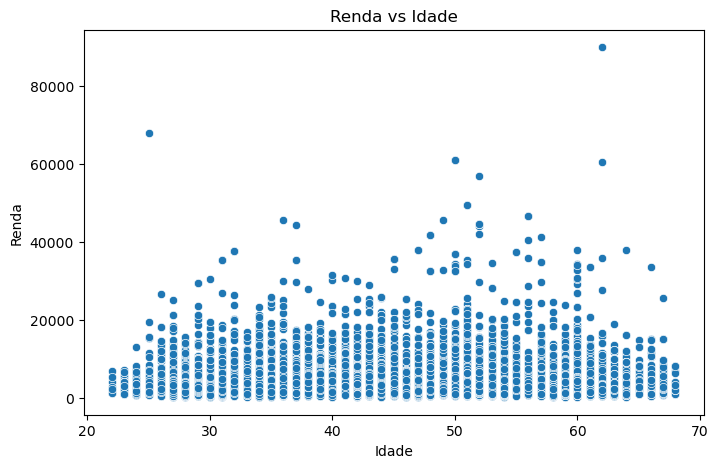

In [15]:
# scatterplot renda x idade
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='idade', y='renda')
plt.title('Renda vs Idade')
plt.xlabel('Idade')
plt.ylabel('Renda')
plt.show()

-> Pessoas de 20 a 24 anos não possuem renda maior que 20.000.

-> Não há um padrão claro de que a renda aumenta com a idade de uma forma geral.

-> Os dados estão mais espalhados horizontalmente (idade de 20 a 70), mas verticalmente seguem um padrão parecido com o gráfico anterior: maioria com renda até 20.000.

3) Na sua opinião, há outliers na variável renda?

Sim, há muitos outliers. Isso significa que há poucas pessoas que ganham valores muito acima da média.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [16]:
# cria uma nova coluna com log da renda
df['log_renda'] = np.log(df['renda'])

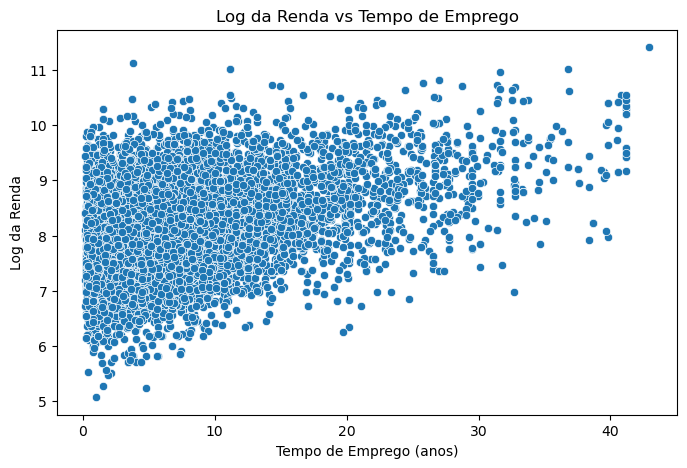

In [18]:
# scatterplot log_renda x tempo_emprego
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='tempo_emprego', y='log_renda')
plt.title('Log da Renda vs Tempo de Emprego')
plt.xlabel('Tempo de Emprego (anos)')
plt.ylabel('Log da Renda')
plt.show()

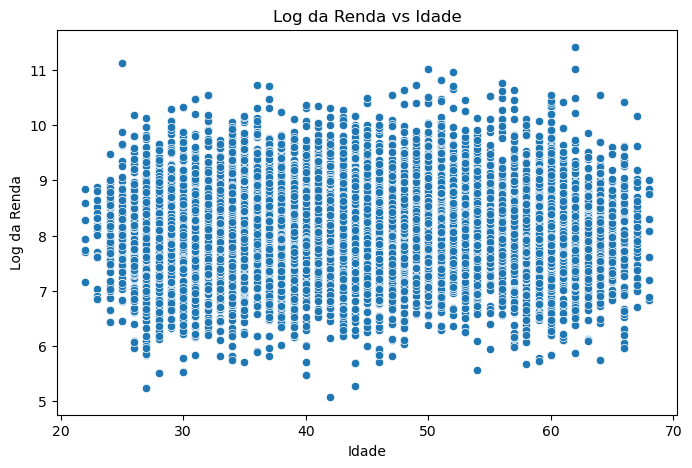

In [19]:
# scatterplot log_renda x idade
plt.figure(figsize=(8, 5))
sns.scatterplot(x='idade', y='log_renda', data=df)
plt.title('Log da Renda vs Idade')
plt.xlabel('Idade')
plt.ylabel('Log da Renda')
plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

A aplicação do logaritmo na variável renda melhorou a análise, pois:

-> Reduziu o impacto dos outliers;

-> A distribuição da renda ficou mais próxima de uma normal, o que facilita a visualização e futuras análises;

-> Os scatterplots ficaram mais limpos, revelando melhor a relação entre renda e as duas variáveis em questão.